In [89]:
from sklearn.datasets import load_diabetes
import numpy as np

In [90]:
diabetes=load_diabetes()

X=diabetes['data']
y=diabetes['target']
n=y.shape[0]

print(diabetes['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [91]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=30)

In [92]:
class MyMultipleLinearRegression:

  def __init__(self,learning_rate,epochs):
    self.lr=learning_rate
    self.epochs=epochs
    self.coef_=0
    self.intercept_=0

  def fit(self,X,y):
    n=X.shape[1]
    self.coef_=np.zeros(n)

    for i in range(self.epochs):
      y_pred=np.dot(X,self.coef_)+self.intercept_
      slope=(-2/n)*np.sum(y-y_pred)
      self.intercept_ -= self.lr*slope

      y_pred=np.dot(X,self.coef_)+self.intercept_
      slope=(-2/n)*np.dot((y-y_pred),X)
      self.coef_ -= self.lr*slope
    
  def predict(self,X):
    return np.dot(X,self.coef_) + self.intercept_ 

In [93]:
from sklearn.metrics import r2_score
myMLR = MyMultipleLinearRegression(0.01,1000)

myMLR.fit(train_x,train_y)
print("Intercept: ",myMLR.intercept_)
print(myMLR.coef_,"\n\n")

print(r2_score(test_y,myMLR.predict(test_x)))

Intercept:  151.29849488329003
[  -4.34720127 -152.23612034  438.91708718  293.17053154  -33.99762813
  -96.40907277 -173.91388552   90.66373403  369.72989161  145.93377066] 


0.49844510504651984


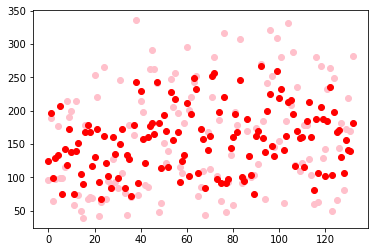

In [94]:
import matplotlib.pyplot as plt

indexes=range(test_y.shape[0])
plt.scatter(indexes,test_y,color='pink')
plt.scatter(indexes,myMLR.predict(test_x),color='red')